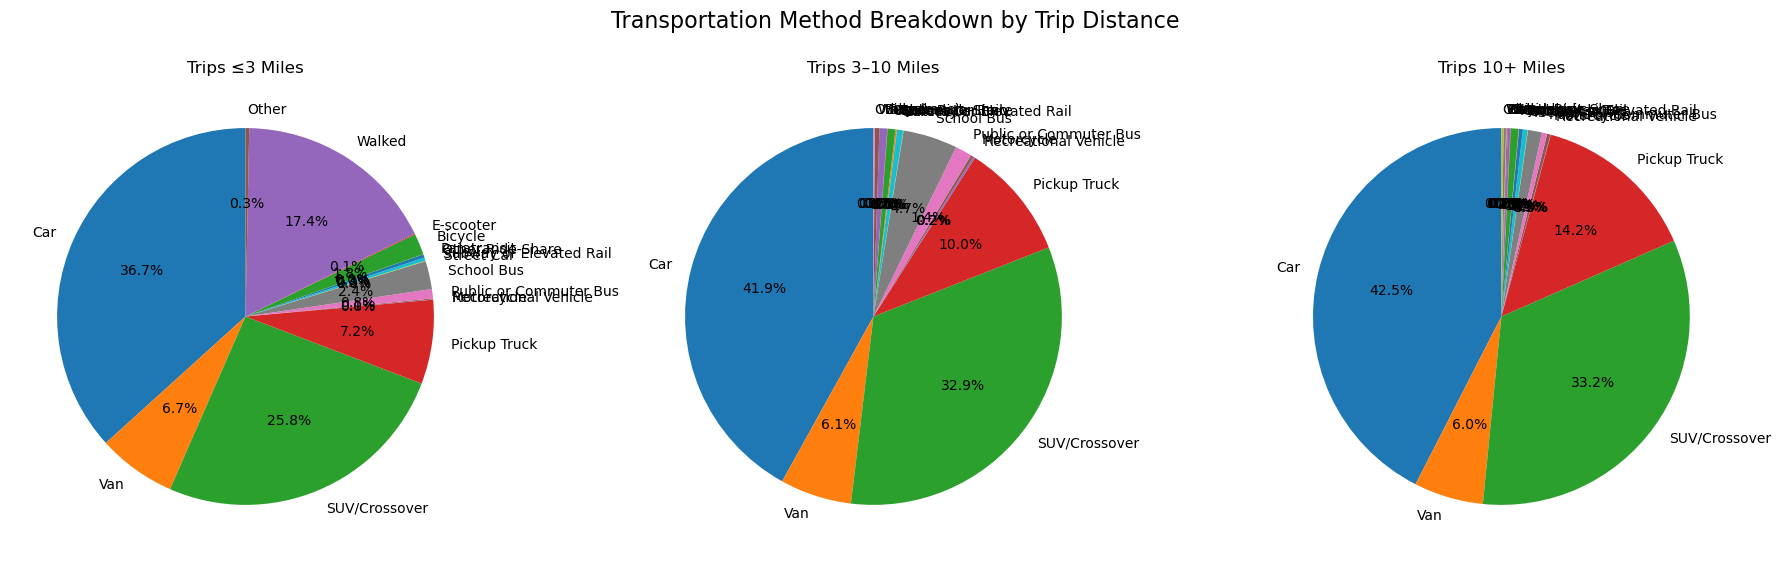

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hhv = pd.read_csv("dataset/hhv2pub.csv")
ldtv = pd.read_csv("dataset/ldtv2pub.csv")
perv = pd.read_csv("dataset/perv2pub.csv")
tripv = pd.read_csv("dataset/tripv2pub.csv")
vehv = pd.read_csv("dataset/vehv2pub.csv")

short_trips = tripv[tripv['TRPMILES'] <= 3]
medium_trips = tripv[(tripv['TRPMILES'] >3) & (tripv['TRPMILES'] <= 10)]
long_trips = tripv[tripv['TRPMILES'] > 10]

short_trips_sum = short_trips.groupby('TRPTRANS')['WTTRDFIN'].sum()
medium_trips_sum = medium_trips.groupby('TRPTRANS')['WTTRDFIN'].sum()
long_trips_sum = long_trips.groupby('TRPTRANS')['WTTRDFIN'].sum()

transport_names = {1: 'Car', 2: 'Van', 3: 'SUV/Crossover', 4: 'Pickup Truck', 6: 'Recreational Vehicle', 7: 'Motorcycle', 8: 'Public or Commuter Bus', 9: 'School Bus', 10: 'Street Car', 11: 'Subway or Elevated Rail', 12: 'Commuter Rail', 13: 'Amtrak', 14: 'Airplane', 15: 'Taxicab or Limo', 16: 'Other Ride-Share', 17: 'Paratransit', 18: 'Bicycle', 19: 'E-scooter', 20: 'Walked', 21: 'Other'}
short_trips_sum.index = short_trips_sum.index.map(transport_names)

transport_names = {1: 'Car', 2: 'Van', 3: 'SUV/Crossover', 4: 'Pickup Truck', 6: 'Recreational Vehicle', 7: 'Motorcycle', 8: 'Public or Commuter Bus', 9: 'School Bus', 10: 'Street Car', 11: 'Subway or Elevated Rail', 12: 'Commuter Rail', 13: 'Amtrak', 14: 'Airplane', 15: 'Taxicab or Limo', 16: 'Other Ride-Share', 17: 'Paratransit', 18: 'Bicycle', 19: 'E-scooter', 20: 'Walked', 21: 'Other'}
medium_trips_sum.index = medium_trips_sum.index.map(transport_names)

transport_names = {1: 'Car', 2: 'Van', 3: 'SUV/Crossover', 4: 'Pickup Truck', 6: 'Recreational Vehicle', 7: 'Motorcycle', 8: 'Public or Commuter Bus', 9: 'School Bus', 10: 'Street Car', 11: 'Subway or Elevated Rail', 12: 'Commuter Rail', 13: 'Amtrak', 14: 'Airplane', 15: 'Taxicab or Limo', 16: 'Other Ride-Share', 17: 'Paratransit', 18: 'Bicycle', 19: 'E-scooter', 20: 'Walked', 21: 'Other'}
long_trips_sum.index = long_trips_sum.index.map(transport_names)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Short trips (≤3 miles)
axes[0].pie(short_trips_sum, labels=short_trips_sum.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Trips ≤3 Miles')

# Medium trips (3–10 miles)
axes[1].pie(medium_trips_sum, labels=medium_trips_sum.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Trips 3–10 Miles')

# Long trips (10+ miles)
axes[2].pie(long_trips_sum, labels=long_trips_sum.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Trips 10+ Miles')

# Adjust layout and display
plt.suptitle('Transportation Method Breakdown by Trip Distance', fontsize=16)
plt.tight_layout()
plt.show()


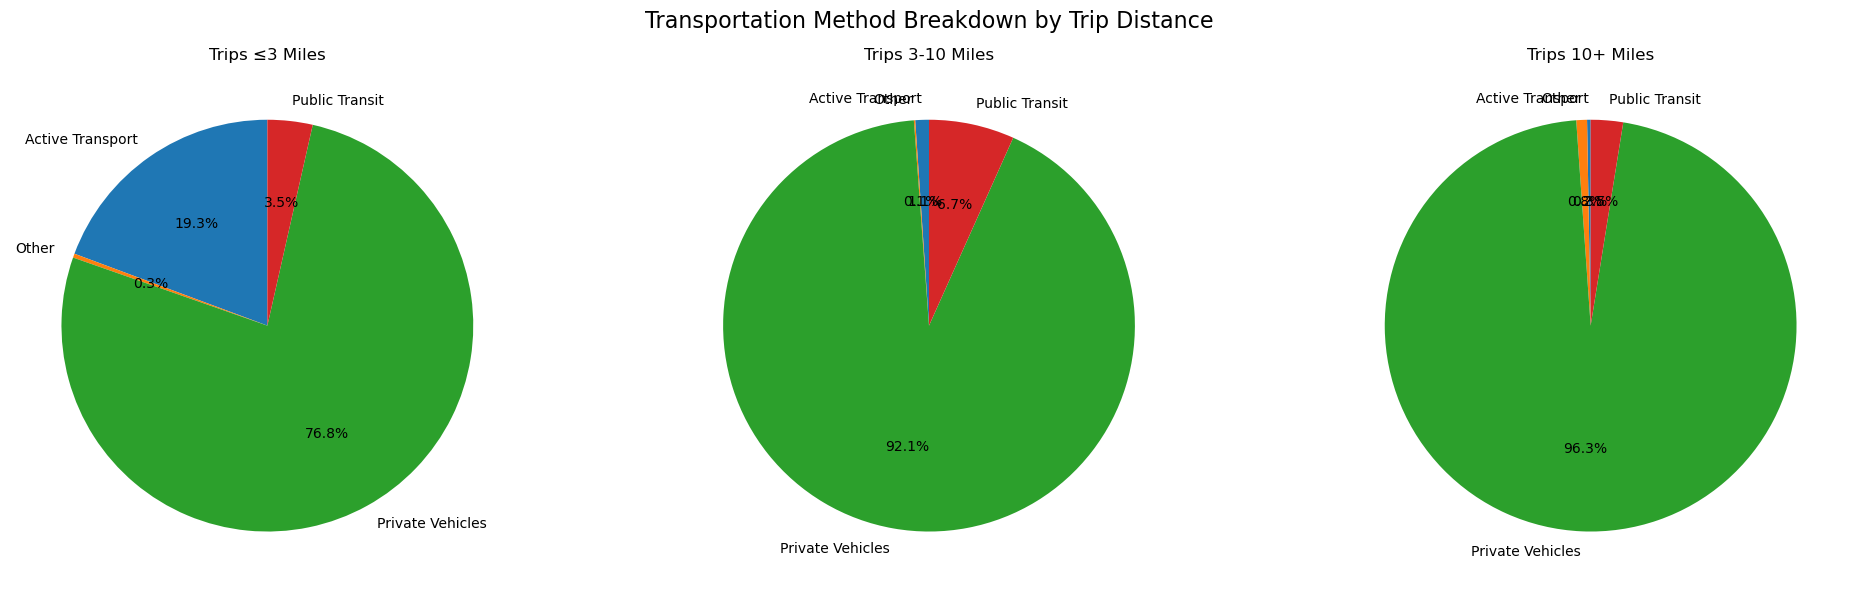

In [ ]:
vehicle_categories = {
    'Car': 'Private Vehicles',
    'Van': 'Private Vehicles',
    'SUV/Crossover': 'Private Vehicles',
    'Pickup Truck': 'Private Vehicles',
    'Recreational Vehicle': 'Private Vehicles',
    'Motorcycle': 'Private Vehicles',
    'Public or Commuter Bus': 'Public Transit',
    'School Bus': 'Public Transit',
    'Street Car': 'Public Transit',
    'Subway or Elevated Rail': 'Public Transit',
    'Commuter Rail': 'Public Transit',
    'Amtrak': 'Public Transit',
    'Airplane': 'Other',
    'Taxicab or Limo': 'Private Vehicles',
    'Other Ride-Share': 'Private Vehicles',
    'Paratransit': 'Public Transit',
    'Bicycle': 'Active Transport',
    'E-scooter': 'Active Transport',
    'Walked': 'Active Transport',
    'Other': 'Other'
}

# Function to aggregate the data
def aggregate_vehicle_data(df_sum):
    df = df_sum.reset_index(name='WTTRDFIN')  # Creates columns 'TRPTRANS' and 'WTTRDFIN'
    df['Category'] = df['TRPTRANS'].map(vehicle_categories)
    return df.groupby('Category')['WTTRDFIN'].sum()

# Aggregate each distance group
short_aggregated = aggregate_vehicle_data(short_trips_sum)
medium_aggregated = aggregate_vehicle_data(medium_trips_sum)
long_aggregated = aggregate_vehicle_data(long_trips_sum)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Short trips (≤3 miles)
axes[0].pie(short_aggregated, labels=short_aggregated.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Trips ≤3 Miles')

# Medium trips (3-10 miles)
axes[1].pie(medium_aggregated, labels=medium_aggregated.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Trips 3-10 Miles')

# Long trips (10+ miles)
axes[2].pie(long_aggregated, labels=long_aggregated.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Trips 10+ Miles')

plt.suptitle('Transportation Method Breakdown by Trip Distance', fontsize=16)
plt.tight_layout()
plt.show()

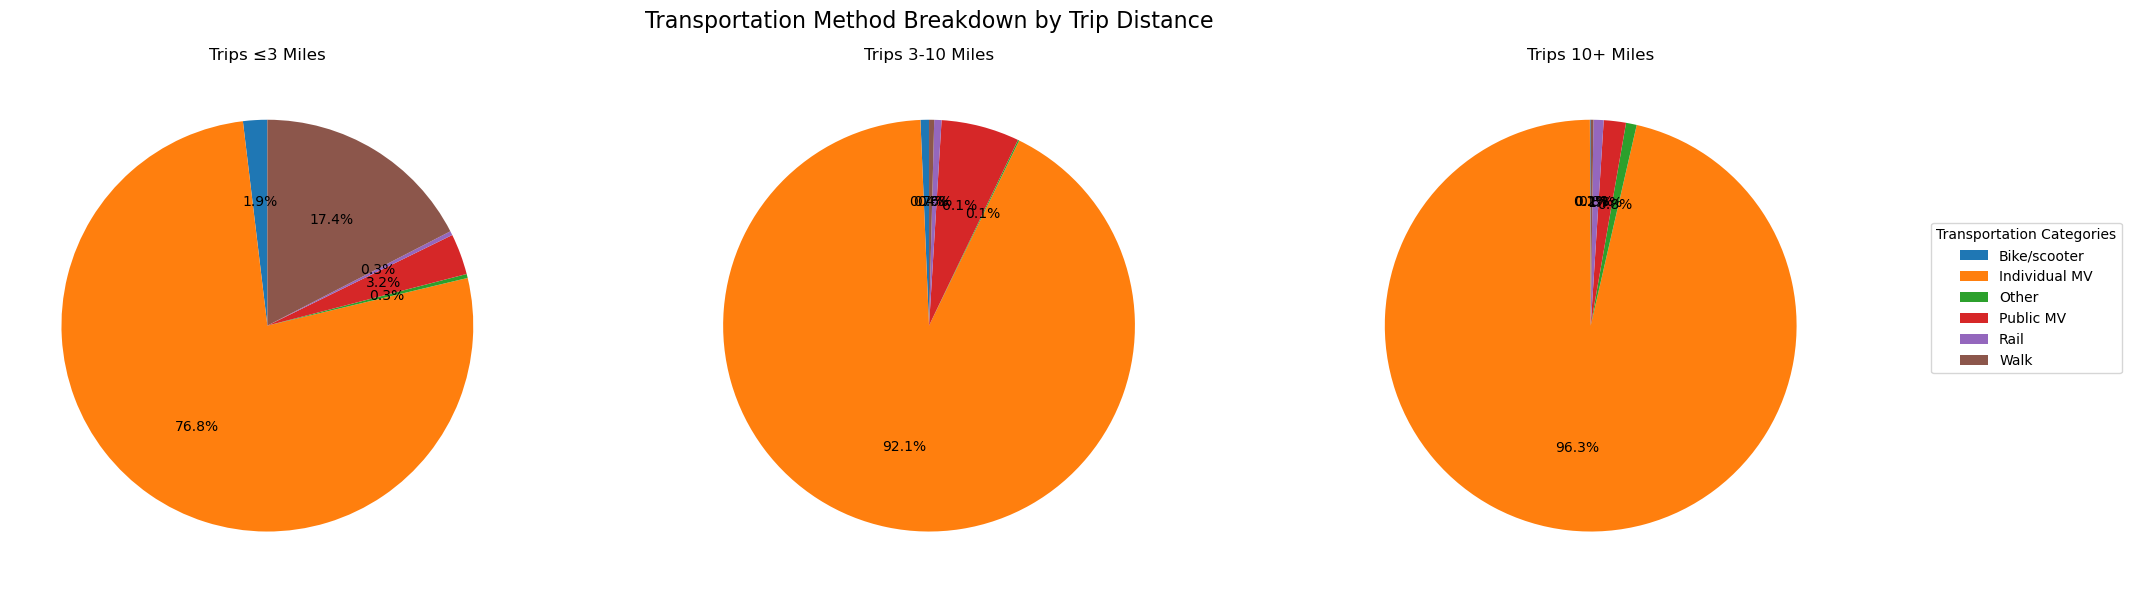

In [29]:
vehicle_categories = {
    'Car': 'Individual MV',
    'Van': 'Individual MV',
    'SUV/Crossover': 'Individual MV',
    'Pickup Truck': 'Individual MV',
    'Recreational Vehicle': 'Individual MV',
    'Motorcycle': 'Individual MV',
    'Public or Commuter Bus': 'Public MV',
    'School Bus': 'Public MV',
    'Street Car': 'Rail',
    'Subway or Elevated Rail': 'Rail',
    'Commuter Rail': 'Rail',
    'Amtrak': 'Rail',
    'Airplane': 'Other',
    'Taxicab or Limo': 'Individual MV',
    'Other Ride-Share': 'Individual MV',
    'Paratransit': 'Public MV',
    'Bicycle': 'Bike/scooter',
    'E-scooter': 'Bike/scooter',
    'Walked': 'Walk',
    'Other': 'Other'
}

# Function to aggregate the data
def aggregate_vehicle_data(df_sum):
    df = df_sum.reset_index(name='WTTRDFIN')  # Creates columns 'TRPTRANS' and 'WTTRDFIN'
    df['Category'] = df['TRPTRANS'].map(vehicle_categories)
    return df.groupby('Category')['WTTRDFIN'].sum()

# Aggregate each distance group
short_aggregated = aggregate_vehicle_data(short_trips_sum)
medium_aggregated = aggregate_vehicle_data(medium_trips_sum)
long_aggregated = aggregate_vehicle_data(long_trips_sum)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Short trips (≤3 miles)
wedges, texts, autotexts = axes[0].pie(short_aggregated, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Trips ≤3 Miles')

# Medium trips (3-10 miles)
wedges, texts, autotexts = axes[1].pie(medium_aggregated, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Trips 3-10 Miles')

# Long trips (10+ miles)
wedges, texts, autotexts = axes[2].pie(long_aggregated, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Trips 10+ Miles')

# Create a single legend for all subplots
fig.legend(wedges, short_aggregated.index, 
           title="Transportation Categories",
           loc="center right",
           bbox_to_anchor=(1.1, 0.5))

plt.suptitle('Transportation Method Breakdown by Trip Distance', fontsize=16)
plt.tight_layout()
plt.show()


In [24]:
hhvurb = hhv[["HOUSEID","URBRUR"]]
triptransport = tripv[["HOUSEID", "HHFAMINC"]]
print(hhvurb)

         HOUSEID  URBRUR
0     9000013002       1
1     9000013016       1
2     9000013026       1
3     9000013039       1
4     9000013041       1
...          ...     ...
7888  9000218013       1
7889  9000218021       2
7890  9000218034       2
7891  9000218036       2
7892  9000218040       2

[7893 rows x 2 columns]


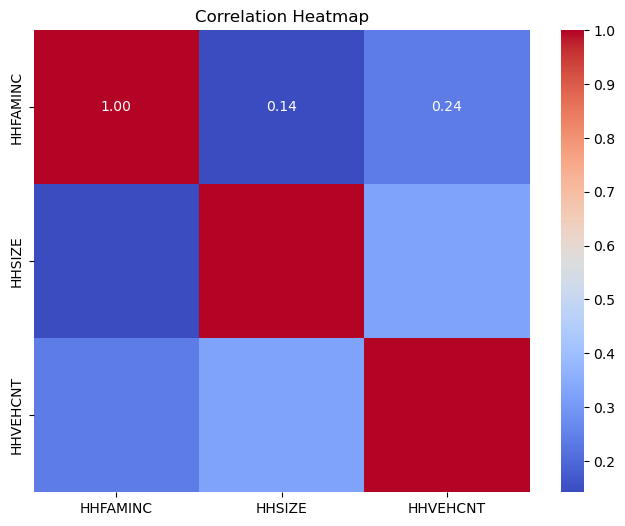

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
corr = tripv[['HHFAMINC', 'HHSIZE', 'HHVEHCNT']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

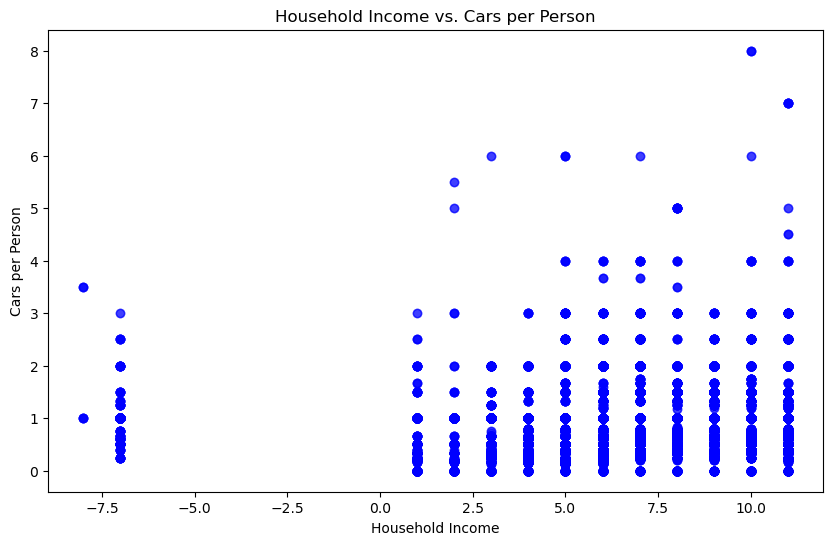

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Calculate cars per person
tripv['cars_per_person'] = tripv['HHVEHCNT'] / tripv['HHSIZE']

# Drop rows where num_people is 0 (to avoid division by zero)
#df = df[df['num_people'] > 0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tripv['HHFAMINC'], tripv['cars_per_person'], alpha=0.5, c='blue')

# Label the axes
plt.xlabel('Household Income')
plt.ylabel('Cars per Person')


# Add a title
plt.title('Household Income vs. Cars per Person')

# Show the plot
plt.show()


      HOUSEID  PERSONID  TRIPID  SEQ_TRIPID     VEHCASEID  FRSTHM  PARK  \
0  9000013002         1       1           1  900001300201       1     2   
1  9000013002         1       2           2  900001300201       1     2   
2  9000013002         2       1           1  900001300202       1    -1   
3  9000013002         2       2           2  900001300202       1    -1   
4  9000013002         2       3           3  900001300202       1    -1   

   HHMEMDRV  TDWKND  TRAVDAY  ...  DRIVER  R_RACE  R_HISP  PROXY  EDUC  \
0         1       1        1  ...       1       1       2      1     7   
1         1       1        1  ...       1       1       2      1     7   
2         1       1        1  ...       1       1       2      2     7   
3         1       1        1  ...       1       1       2      2     7   
4         1       1        1  ...       1       1       2      2     7   

   PRMACT  R_SEX_IMP  VEHTYPE  HHFAMINC_IMP  cars_per_person  
0       3          2        3            

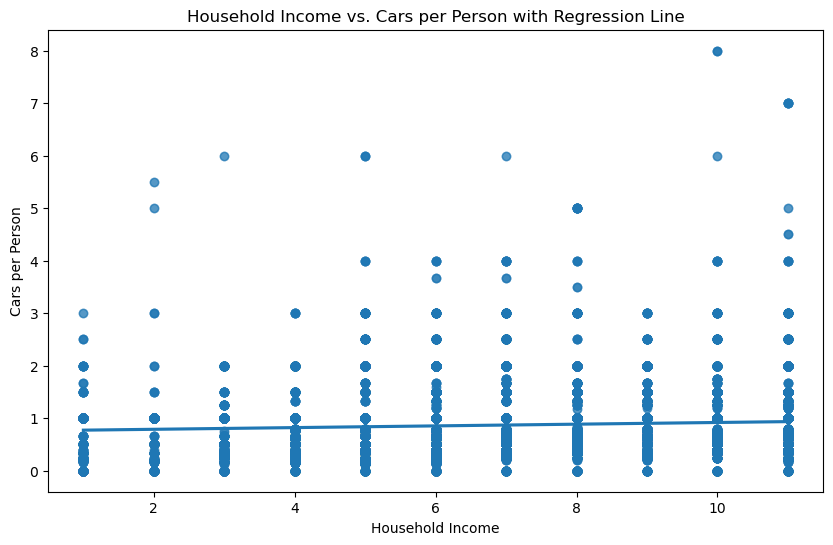

In [9]:
# Define a list of values to remove
values_to_remove = [-7, -8]  # Example: remove rows where income is 0 or 99999

# Use boolean indexing to exclude rows with these values
df_filtered = tripv[~tripv['HHFAMINC'].isin(values_to_remove)]

# Check the filtered DataFrame
print(df_filtered.head())

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='HHFAMINC', y='cars_per_person', data=df_filtered, scatter_kws={'alpha':0.5})

# Label the axes
plt.xlabel('Household Income')
plt.ylabel('Cars per Person')

# Add a title
plt.title('Household Income vs. Cars per Person with Regression Line')

# Show the plot
plt.show()




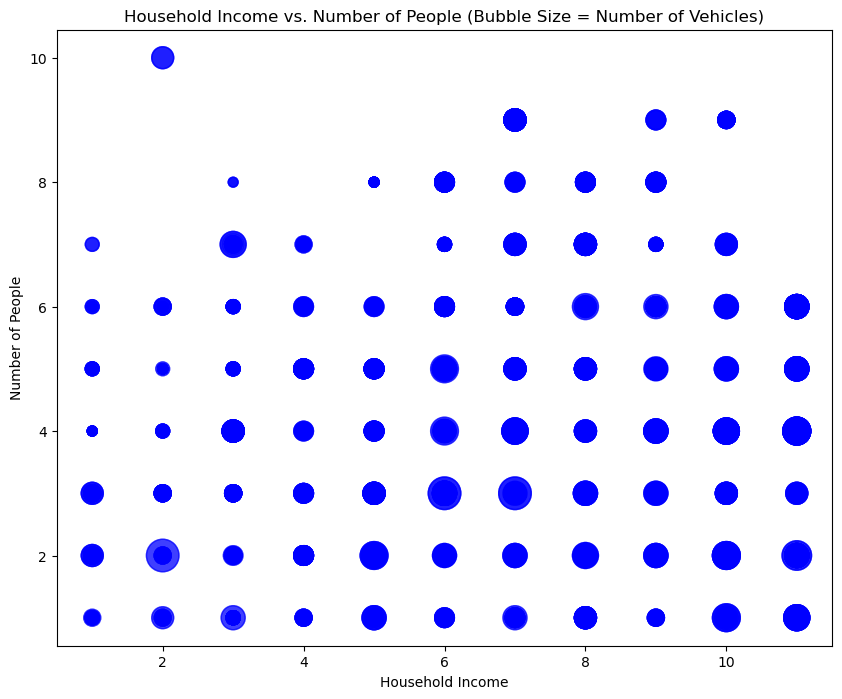

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Create a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['HHFAMINC'], df_filtered['HHSIZE'], s=df_filtered['HHVEHCNT']*50, alpha=0.5, c='blue')

# Label the axes
plt.xlabel('Household Income')
plt.ylabel('Number of People')

# Add a title
plt.title('Household Income vs. Number of People (Bubble Size = Number of Vehicles)')

# Show the plot
plt.show()

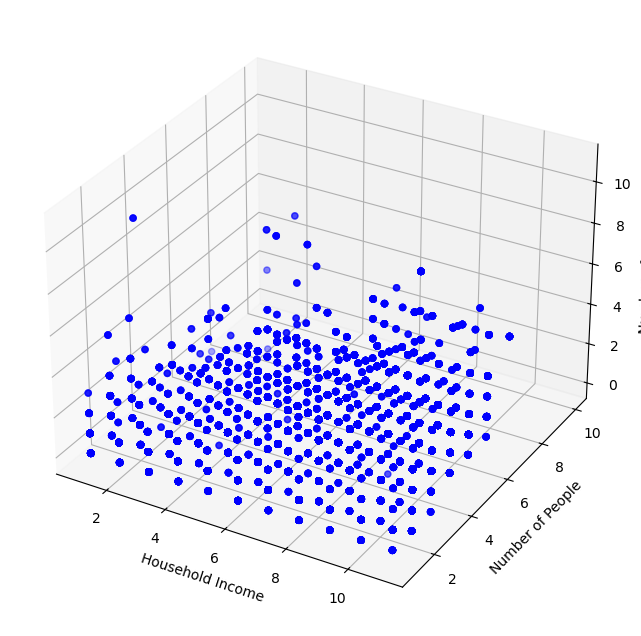

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df_filtered['HHFAMINC'], df_filtered['HHSIZE'], df_filtered['HHVEHCNT'], c='blue', marker='o')

# Label the axes
ax.set_xlabel('Household Income')
ax.set_ylabel('Number of People')
ax.set_zlabel('Number of Vehicles')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
csv_file = '2022_Passenger_OD_Annual_Data.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Step 2: Extract the data for the pie chart
# Assuming the first column is the category and the second is the value
categories = df.iloc[:, 0]  # First column as categories
values = df.iloc[:, 1]      # Second column as values

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the chart
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Breakdown of Categories')  # Add a title
plt.axis('equal')  # Ensure the pie chart is circular

# Step 4: Show the chart
plt.show()

In [18]:
inc_mapping_series = pd.Series({-7: r"I prefer not to answer",
                            -8: r"I don't know", 
                            1: r"01 - Less than \$10,000", 
                            2: r"02 - \$10,000 - \$14,999",
                            3: r"03 - \$15,000 - \$24,999",
                            4: r"04 - \$25,000 - \$34,999",
                            5: r"05 - \$35,000 - \$49,999",
                            6: r"06 - \$50,000 - \$74,999",
                            7: r"07 - \$75,000 - \$99,999",
                            8: r"08 - \$100,000 - \$124,999",
                            9: r"09 - \$125,000 - \$149,999",
                            10: r"10 - \$150,000 - \$199,999",
                            11: r"11 - \$200,000 or more"
                            })
tripv['HHFAMINC_label'] = tripv['HHFAMINC'].replace(inc_mapping_series)
#print(tripv)

trans_mapping_series = pd.Series({1: "Car", 
                            2: "Van",
                            3: "SUV/Crossover",
                            4: "Pickup truck",

                            6: "Recreational Vehicle",
                            7: "Motorcycle",
                            8: "Public or commuter bus",
                            9: "School bus",
                            10: "Street car or trolley car",
                            11: "Subway or elevated rail",
                            12: "Commuter rail",
                            13: "Amtrak",
                            14: "Airplane",
                            15: "Taxicab or limo service",
                            16: "Other ride-sharing service",
                            17: "Paratransit/ Dial a ride",
                            18: "Bicycle (including bikeshare, ebike, etc.)",
                            19: "E-scooter",
                            20: "Walked",
                            21: "Other (specify)"
                            })
tripv['TRPTRANS_label'] = tripv['TRPTRANS'].replace(trans_mapping_series)


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Creating crosstab
crosstb = pd.crosstab(tripv.HHFAMINC_label, tripv.TRPTRANS_label).sort_index(axis = 0)
crosstb_ord = crosstb[crosstb.sum().sort_values(ascending=False).index]

# Heatmap
heatmap = sns.heatmap(crosstb_ord.rename_axis(index=None, columns=None))

AttributeError: 'DataFrame' object has no attribute 'HHFAMINC_label'

In [13]:
import pandas as pd

hhv = pd.read_csv("dataset/hhv2pub.csv")
ldtv = pd.read_csv("dataset/ldtv2pub.csv")
perv = pd.read_csv("dataset/perv2pub.csv")
tripv = pd.read_csv("dataset/tripv2pub.csv")
vehv = pd.read_csv("dataset/vehv2pub.csv")

# Calculate the 'cars per drivers' column
#hhv['cars_per_driver'] = hhv['HHVEHCNT'] / hhv['DRVRCNT']

# Define bins and labels
#bins = [0, 1, 2, 3, 4, 5, np.inf]  # Use np.inf to capture all values >= 5
#labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Bin the "cars_per_driver" column
#hhv['cars_per_driver_bin'] = pd.cut(hhv['cars_per_driver'], bins=bins, labels=labels, include_lowest=True)



import numpy as np

# Calculate 'cars_per_driver' if not already done
hhv['cars_per_driver'] = hhv['HHVEHCNT'] / hhv['DRVRCNT']

# Define conditions and labels
conditions = [
    hhv['cars_per_driver'] < 1,
    hhv['cars_per_driver'] == 1,
    hhv['cars_per_driver'] > 1
]
labels = ['less than 1', 'exactly 1', 'more than 1']

# Apply categorization
hhv['cars_per_driver_bin'] = np.select(conditions, labels, default=np.nan)

# Display the updated DataFrame
print(hhv.cars_per_driver_bin)


0         exactly 1
1       less than 1
2       less than 1
3       less than 1
4         exactly 1
           ...     
7888      exactly 1
7889      exactly 1
7890      exactly 1
7891            nan
7892      exactly 1
Name: cars_per_driver_bin, Length: 7893, dtype: object


In [14]:
inc_mapping_series = pd.Series({-7: r"I prefer not to answer",
                            -8: r"I don't know", 
                            1: r"01 - Less than \$10,000", 
                            2: r"02 - \$10,000 - \$14,999",
                            3: r"03 - \$15,000 - \$24,999",
                            4: r"04 - \$25,000 - \$34,999",
                            5: r"05 - \$35,000 - \$49,999",
                            6: r"06 - \$50,000 - \$74,999",
                            7: r"07 - \$75,000 - \$99,999",
                            8: r"08 - \$100,000 - \$124,999",
                            9: r"09 - \$125,000 - \$149,999",
                            10: r"10 - \$150,000 - \$199,999",
                            11: r"11 - \$200,000 or more"
                            })
hhv['HHFAMINC_label'] = hhv['HHFAMINC'].replace(inc_mapping_series)
#print(hhv)


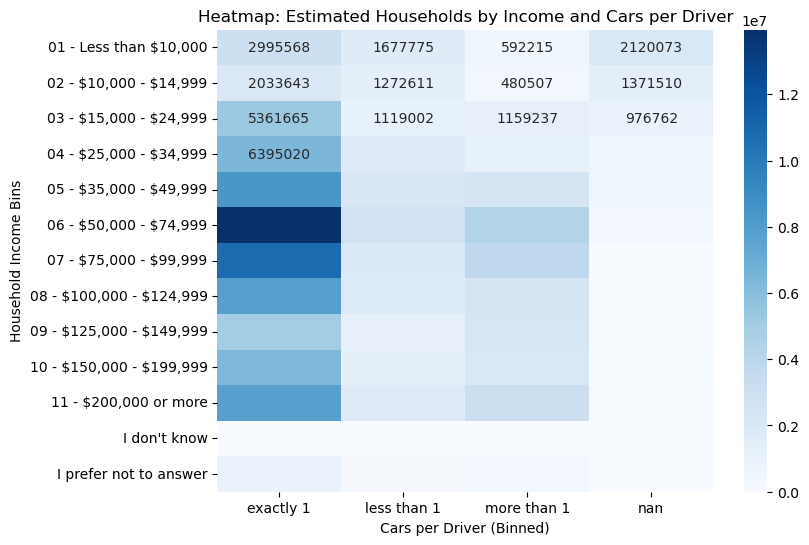

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with weighted sums
pivot_table = hhv.pivot_table(
    index='HHFAMINC_label',  # Rows
    columns='cars_per_driver_bin',  # Columns
    values='WTHHFIN',  # Values to aggregate (the weight column)
    aggfunc='sum',  # Sum the weights
    fill_value=0  # Fill missing combinations with 0
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues', cbar=True)
plt.xlabel('Cars per Driver (Binned)')
plt.ylabel('Household Income Bins')
plt.title('Heatmap: Estimated Households by Income and Cars per Driver')
plt.show()

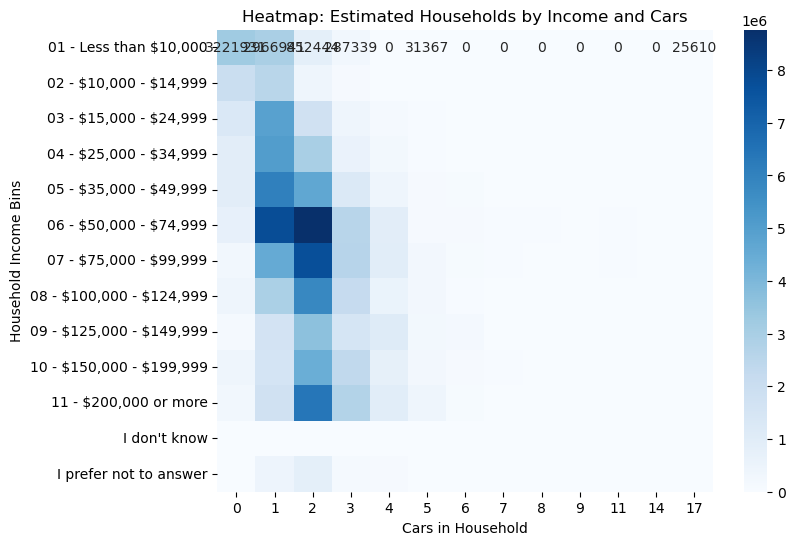

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with weighted sums
pivot_table = hhv.pivot_table(
    index='HHFAMINC_label',  # Rows
    columns='HHVEHCNT',  # Columns
    values='WTHHFIN',  # Values to aggregate (the weight column)
    aggfunc='sum',  # Sum the weights
    fill_value=0  # Fill missing combinations with 0
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues', cbar=True)
plt.xlabel('Cars in Household')
plt.ylabel('Household Income Bins')
plt.title('Heatmap: Estimated Households by Income and Cars')
plt.show()

In [3]:
# Assuming the weight column is 'WTHHFIN' (adjust if different)
weight_column = 'WTHHFIN'

# Filter out excluded income values
hhv2 = hhv[~hhv['HHFAMINC'].isin([-7, -8])]

# Create weighted driver count
hhv2['WEIGHTED_DRVRCNT'] = hhv2['DRVRCNT'] * hhv2[weight_column]

# Group by region and income to compute weighted averages
def compute_weighted_avg(df):
    grouped = df.groupby('HHFAMINC').agg(
        TOTAL_WEIGHTED_DRIVERS=('WEIGHTED_DRVRCNT', 'sum'),
        TOTAL_WEIGHTED_HOUSEHOLDS=(weight_column, 'sum')
    ).reset_index()
    grouped['AVG_DRIVERS_PER_HH'] = grouped['TOTAL_WEIGHTED_DRIVERS'] / grouped['TOTAL_WEIGHTED_HOUSEHOLDS']
    return grouped

# Apply to each region
regions = {
    1: 'New England',
    2: 'Mid Atlantic',
    3: 'East North Central',
    4: 'West North Central',
    5: 'South Atlantic',
    6: 'East South Central',
    7: 'West South Central',
    8: 'Mountain',
    9: 'Pacific'
}

region_dfs = {}
for region_num, region_name in regions.items():
    region_df = hhv2[hhv2['CENSUS_D'] == region_num]
    region_avg = compute_weighted_avg(region_df)
    region_dfs[region_name] = region_avg

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for ax, (region_name, df) in zip(axes.flatten(), region_dfs.items()):
    ax.bar(df['HHFAMINC'], df['AVG_DRIVERS_PER_HH'])
    ax.set_xlabel('Family Income')
    ax.set_ylabel('Avg. Drivers per Household')
    ax.set_title(region_name)
    ax.set_xticks(df['HHFAMINC'])
    ax.set_xticklabels(df['HHFAMINC'].astype(int), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\garrett\AppData\Local\Temp\4\ipykernel_43448\251876711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhv2['WEIGHTED_DRVRCNT'] = hhv2['DRVRCNT'] * hhv2[weight_column]


NameError: name 'plt' is not defined